In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy

In [2]:
def AlexNet(X_train, y_train, **kwargs):
    
    model = Sequential([
        Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(384, 512, 3)), # L1
        MaxPooling2D(pool_size=(3,3), strides=(2,2)), # L2
        Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu'), # L3
        MaxPooling2D(pool_size=(3,3), strides=(2,2)), # L4
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'), # L5
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'), # L6
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'), # L7
        MaxPooling2D(pool_size=(3,3), strides=(2,2)), # L8
        Flatten(),
        Dense(4096, activation='relu'), # L9
        Dropout(0.5),
        Dense(4096, activation='relu'), # L10
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])
    history = model.fit(X_train, y_train, **kwargs)
    return model, history

In [3]:
X, y = [], []
folder = 'new-house-resized-dataset'
folder_list = os.listdir(folder)
for file in folder_list:
    print('.',end='')
    category = file.split('_')[0]
    if category == 'recycle':
        y.append([1,0,0])
    elif category == 'trash':
        y.append([0,1,0])
    elif category == 'compost':
        y.append([0,0,1])
    else:
        raise Exception(f'Invalid Waste Catgory: {category}')
    img = Image.open(f'{folder}/{file}')
    arr = np.array(img)
    X.append(arr)

print()
print('Datapoints:', len(y))
X, y = np.array(X), np.array(y)
print('Recycle/Trash/Compost:', np.sum(y, axis=0))
print('done')

................................................................................................................................................................................................................................................................................................................................................................
Datapoints: 352
Recycle/Trash/Compost: [117 118 117]
done


In [4]:
SPLIT = 3
TEST_IDX = [271, 318, 309, 108, 110, 70, 256, 331, 111, 224, 3, 55, 114, 117, 164, 295, 254, 149, 221, 48, 192, 316, 195, 167, 307, 66, 165, 10, 152, 265, 338, 76, 99, 201, 151, 162, 311, 169, 253, 29, 322, 32, 61, 74, 52, 157, 91, 255, 187, 136, 314, 266, 325, 269, 332, 185, 9, 351, 250, 22, 347, 172, 260, 73, 321, 133, 299, 220, 18, 98]

def train_test_split(X, y, test_idx=None, test_size=0.2):
    ''' Split input data X and labels y into training and testing arrays '''
    n_list = list(range(len(y)))
    if test_idx is None:
        print('\n -- Performing NEW train-test split -- \n')
        test_idx = np.random.choice(n_list, replace=False, size=int(test_size*len(y)))
    else:
        test_idx = np.array(test_idx)
    train_idx = np.array([i for i in n_list if i not in test_idx])
    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx]
    y_test = y[test_idx]
    return X_train, y_train, X_test, y_test, test_idx

X_train, y_train, X_test, y_test, test_idx = train_test_split(X, y, TEST_IDX)
print(list(test_idx))

[271, 318, 309, 108, 110, 70, 256, 331, 111, 224, 3, 55, 114, 117, 164, 295, 254, 149, 221, 48, 192, 316, 195, 167, 307, 66, 165, 10, 152, 265, 338, 76, 99, 201, 151, 162, 311, 169, 253, 29, 322, 32, 61, 74, 52, 157, 91, 255, 187, 136, 314, 266, 325, 269, 332, 185, 9, 351, 250, 22, 347, 172, 260, 73, 321, 133, 299, 220, 18, 98]


In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(282, 384, 512, 3) (282, 3)
(70, 384, 512, 3) (70, 3)


In [6]:
#class_weight = {0:1, 1:100}
#print(class_weight)
model, hist = AlexNet(X_train, y_train, verbose=True, epochs=100, validation_split=0.2, shuffle=True)
    # batch_size=32)
    # class_weight = class_weight)

Epoch 1/100
8/8 [==============================] - 23s 3s/step - loss: 7.1307 - accuracy: 0.4089 - val_loss: 26.1544 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 27s 3s/step - loss: 4.9290 - accuracy: 0.4489 - val_loss: 6.1275 - val_accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 26s 3s/step - loss: 3.2372 - accuracy: 0.4933 - val_loss: 2.2933 - val_accuracy: 0.1228
Epoch 4/100
8/8 [==============================] - 24s 3s/step - loss: 3.4587 - accuracy: 0.5600 - val_loss: 4.4807 - val_accuracy: 0.0351
Epoch 5/100
8/8 [==============================] - 25s 3s/step - loss: 2.6140 - accuracy: 0.5556 - val_loss: 2.1924 - val_accuracy: 0.3684
Epoch 6/100
8/8 [==============================] - 24s 3s/step - loss: 2.2021 - accuracy: 0.5289 - val_loss: 1.8788 - val_accuracy: 0.3333
Epoch 7/100
8/8 [==============================] - 26s 3s/step - loss: 1.6130 - accuracy: 0.6222 - val_loss: 3.5912 - val_accuracy: 0.0877
Epoch 8/100
8/8 [=

8/8 [==============================] - 28s 3s/step - loss: 0.0875 - accuracy: 0.9689 - val_loss: 0.2027 - val_accuracy: 0.9298
Epoch 60/100
8/8 [==============================] - 29s 4s/step - loss: 0.0381 - accuracy: 0.9867 - val_loss: 0.1745 - val_accuracy: 0.9825
Epoch 61/100
8/8 [==============================] - 28s 3s/step - loss: 0.0593 - accuracy: 0.9778 - val_loss: 0.2036 - val_accuracy: 0.9649
Epoch 62/100
8/8 [==============================] - 28s 3s/step - loss: 0.0489 - accuracy: 0.9733 - val_loss: 0.2822 - val_accuracy: 0.8947
Epoch 63/100
8/8 [==============================] - 28s 3s/step - loss: 0.0243 - accuracy: 0.9956 - val_loss: 0.2472 - val_accuracy: 0.9123
Epoch 64/100
8/8 [==============================] - 28s 3s/step - loss: 0.0307 - accuracy: 0.9911 - val_loss: 0.2405 - val_accuracy: 0.9123
Epoch 65/100
8/8 [==============================] - 28s 3s/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 0.2398 - val_accuracy: 0.9123
Epoch 66/100
8/8 [===============

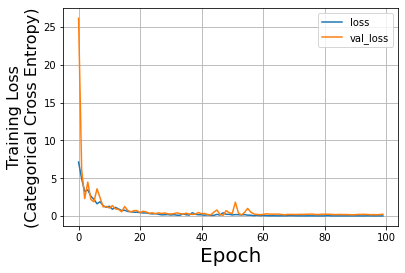

In [14]:
def plot_loss(hist):
    plt.figure()
    plt.plot(hist.history['loss'], label='loss') 
    plt.plot(hist.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch', size=20)
    plt.ylabel('Training Loss\n(Categorical Cross Entropy)', size=16)
    plt.legend()
    plt.grid(True)
    
plot_loss(hist)

In [8]:
y_pred = model.predict(X_test)
y_pred

array([[3.39371129e-03, 9.95890439e-01, 7.15865812e-04],
       [5.34345818e-05, 9.99269664e-01, 6.76796015e-04],
       [2.25291471e-03, 9.97728169e-01, 1.89330367e-05],
       [1.06110010e-05, 9.49157766e-08, 9.99989271e-01],
       [7.09111703e-08, 2.16818541e-09, 9.99999881e-01],
       [1.49063835e-05, 1.10098999e-05, 9.99974132e-01],
       [4.74537910e-06, 9.99907136e-01, 8.80467996e-05],
       [1.01062283e-03, 9.97966170e-01, 1.02318195e-03],
       [7.79198657e-04, 4.41434707e-07, 9.99220371e-01],
       [9.62577760e-01, 2.79502999e-02, 9.47199855e-03],
       [2.09646532e-04, 1.64405070e-03, 9.98146296e-01],
       [2.88552201e-07, 7.66354891e-09, 9.99999762e-01],
       [1.12234454e-06, 3.99799198e-08, 9.99998808e-01],
       [9.98999655e-01, 4.22077021e-04, 5.78300620e-04],
       [1.00000000e+00, 5.17389576e-10, 8.92768010e-13],
       [1.52033169e-06, 9.99996781e-01, 1.69288523e-06],
       [6.53098524e-03, 4.66957152e-01, 5.26511908e-01],
       [9.98749614e-01, 6.57598

In [9]:
y_test_arg = np.argmax(y_test, axis=1)
y_pred_arg = np.argmax(y_pred, axis=1)
print('Recycle (0) vs. Trash (1) vs. Compost (2)\nAlexNet  on New House data')
print('\nConfusion matrix:\n', confusion_matrix(y_test_arg, y_pred_arg))
print('\nAccuracy:', accuracy(y_test_arg, y_pred_arg))

Recycle (0) vs. Trash (1) vs. Compost (2)
AlexNet  on New House data

Confusion matrix:
 [[20  0  1]
 [ 1 23  2]
 [ 0  0 23]]

Accuracy: 0.9428571428571428


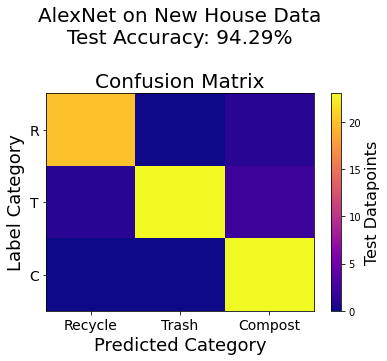

In [19]:
plt.pcolormesh(confusion_matrix(y_test_arg, y_pred_arg), cmap='plasma')
acc = np.round(accuracy(y_test_arg, y_pred_arg)*100, 2)
plt.title(f'AlexNet on New House Data\nTest Accuracy: {acc}%\n\nConfusion Matrix', size=20)
plt.xlabel('Predicted Category', size=18)
plt.ylabel('Label Category', size=18)
plt.xticks([0.5, 1.5, 2.5], ['Recycle', 'Trash', 'Compost'], size=14)
plt.yticks([0.5, 1.5, 2.5], ['R', 'T', 'C'], size=14)
plt.ylim(3,0)
plt.colorbar().set_label(label='Test Datapoints', size=16)

Text(0.5, 1.0, 'AlexNet on New House Data\nClassification Test Accuracy: 94.29%\n')

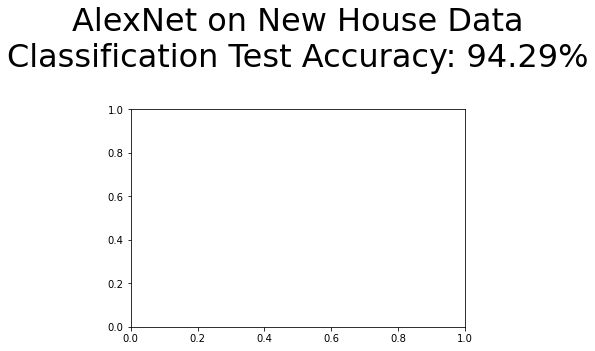

In [24]:
plt.title(f'AlexNet on New House Data\nClassification Test Accuracy: {acc}%\n', size=32)

In [11]:
# np.save(f'X_train_split{SPLIT}', X_train)
# np.save(f'y_train_split{SPLIT}', y_train)
# np.save(f'X_test_split{SPLIT}', X_test)
# np.save(f'y_test_split{SPLIT}', y_test)
# with open(f'test_idx_split{SPLIT}.txt', 'w') as f:
#     f.write(str(list(test_idx)))
# print('split saved')

In [12]:
model_name = f'AlexNet_model_split{SPLIT}'
model_json = model.to_json()
with open(f'{model_name}.json', 'w') as jf:
    jf.write(model_json)
model.save_weights(f'{model_name}.h5')

In [13]:
# from tensorflow.keras.models import model_from_json
with open(f'{model_name}.json') as jf:
    json = jf.read()
loaded_model = model_from_json(json)
loaded_model.load_weights(f'{model_name}.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 126, 96)       34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 62, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 58, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 28, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 26, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 24, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 22, 256)       8